# Exploratory Data Analysis

## By: Harshita Aswani

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from wordcloud import WordCloud

In [2]:
df=pd.read_csv('/kaggle/input/salary-data-analist/ds_salaries new.csv')

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [5]:
df.shape

(3755, 11)

In [6]:
df.size

41305

In [7]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [9]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [10]:
df.duplicated().value_counts()

False    2584
True     1171
Name: count, dtype: int64

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [14]:
df.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [15]:
threshold = 3

# Calculate the Z-scores for the 'salary_in_usd' column
z_scores = stats.zscore(df['salary_in_usd'])

# Identify outliers using the threshold
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Remove outliers from the DataFrame
df = df[~outliers]

# Display the shape after removing outliers
print(f"Shape after removing outliers: {df.shape}")

Shape after removing outliers: (2563, 11)


In [16]:
# Set the style of seaborn
sns.set(style="whitegrid")

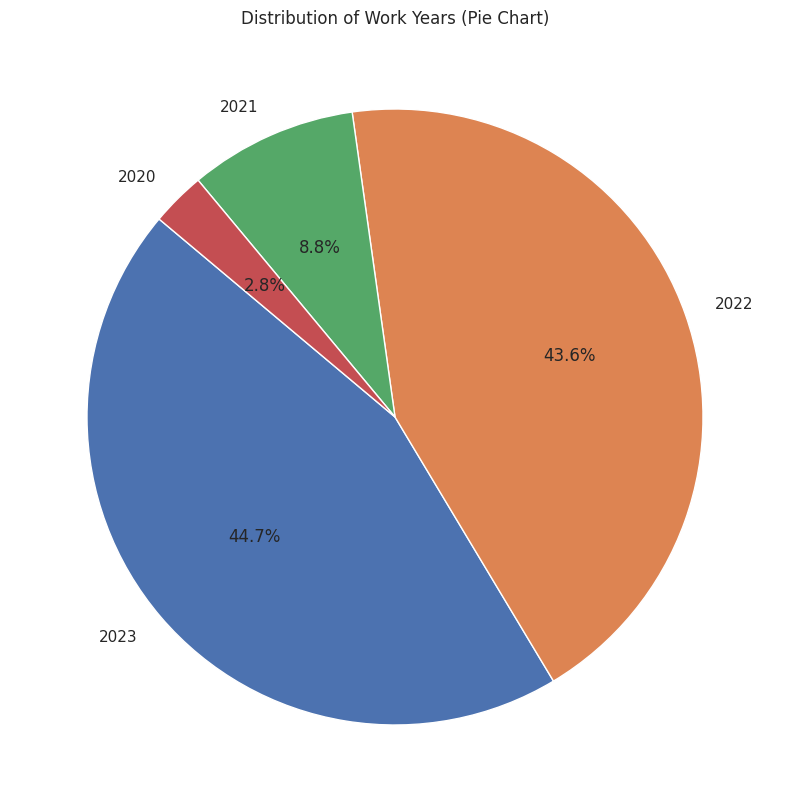

In [17]:
# Visualizing 'work_year' as a pie chart
plt.figure(figsize=(10, 10))
work_year_counts = df['work_year'].value_counts()
plt.pie(work_year_counts, labels=work_year_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Work Years (Pie Chart)')
plt.show()

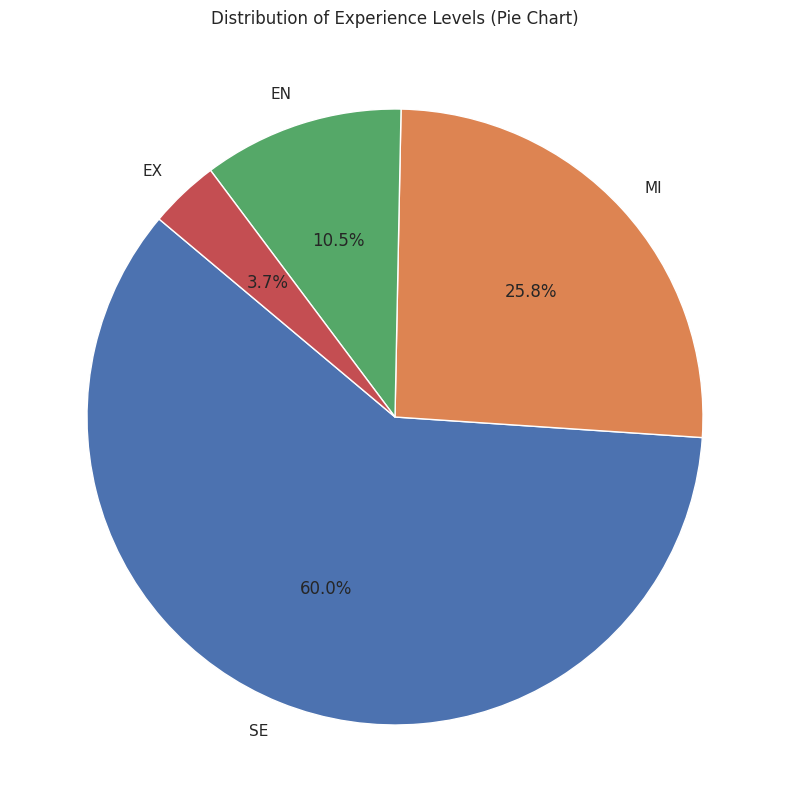

In [18]:
# Visualizing 'experience_level' as a pie chart
plt.figure(figsize=(10, 10))
experience_level_counts = df['experience_level'].value_counts()
plt.pie(experience_level_counts, labels=experience_level_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Experience Levels (Pie Chart)')
plt.show()

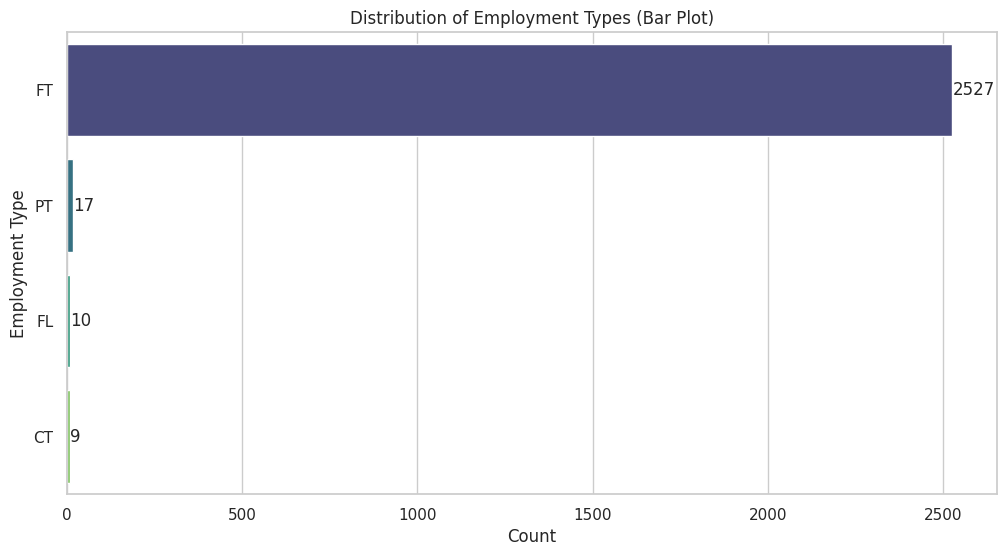

In [19]:
# Visualizing 'employment_type' as a horizontal bar plot with labels
plt.figure(figsize=(12, 6))
employment_type_counts = df['employment_type'].value_counts()
barplot = sns.barplot(x=employment_type_counts.values, y=employment_type_counts.index, palette='viridis')

# Adding labels with values
for index, value in enumerate(employment_type_counts.values):
    barplot.text(value, index, f'{value}', ha="left", va="center", fontsize=12)

plt.title('Distribution of Employment Types (Bar Plot)')
plt.xlabel('Count')
plt.ylabel('Employment Type')
plt.show()

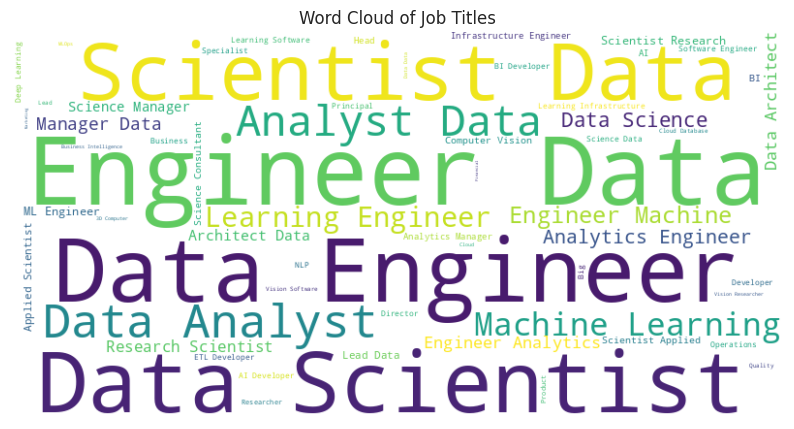

In [20]:
# Visualizing 'job_title'
# Generate a word cloud from 'job_title'
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['job_title']))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Job Titles')
plt.show()

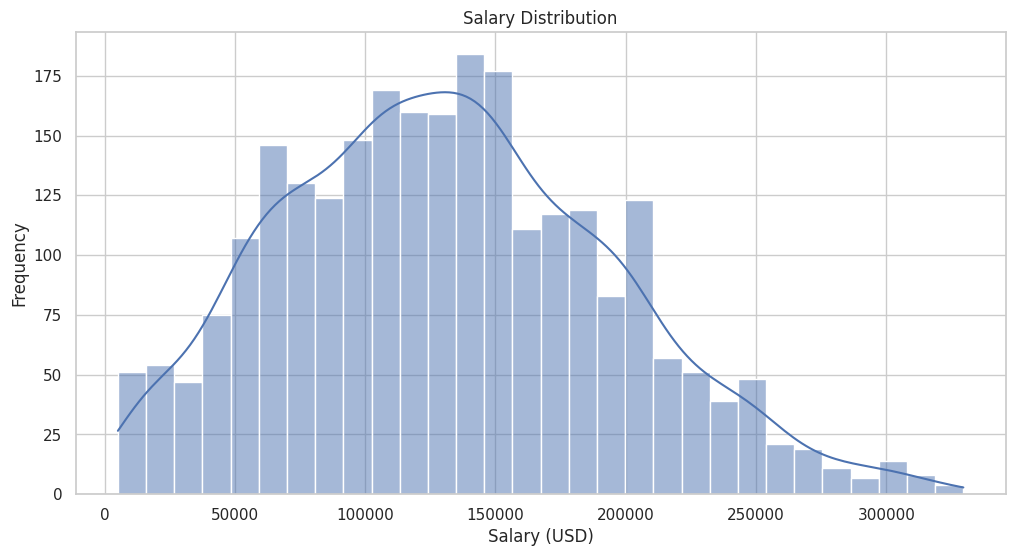

In [21]:
# Visualizing 'salary'
plt.figure(figsize=(12, 6))
sns.histplot(df['salary_in_usd'], bins=30, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()

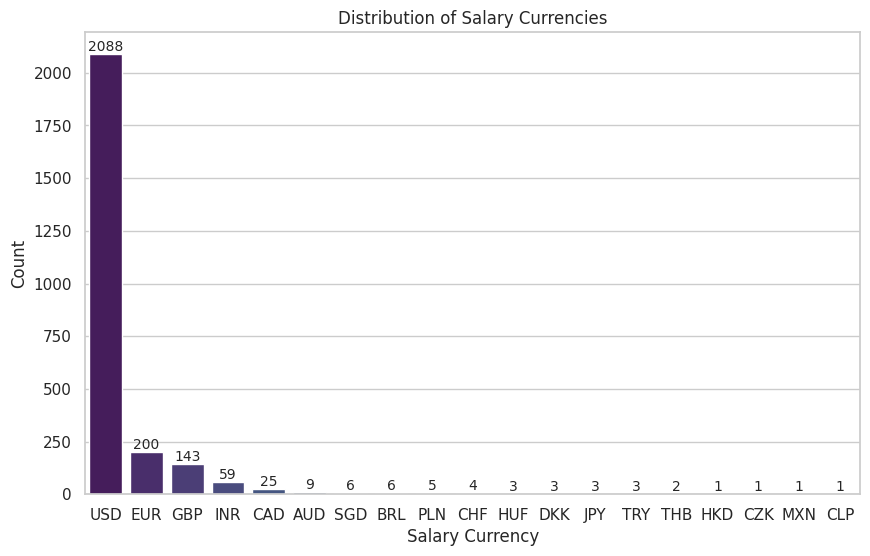

In [22]:
# Get the counts and order the 'salary_currency' values in descending order
salary_currency_counts = df['salary_currency'].value_counts()
order = salary_currency_counts.index

# Visualizing 'salary_currency' as a bar plot with labels in descending order
plt.figure(figsize=(10, 6))
barplot = sns.countplot(x='salary_currency', data=df, order=order, palette='viridis')

# Adding labels with values
for index, value in enumerate(salary_currency_counts):
    barplot.text(index, value, f'{value}', ha="center", va="bottom", fontsize=10)

plt.title('Distribution of Salary Currencies')
plt.xlabel('Salary Currency')
plt.ylabel('Count')
plt.show()

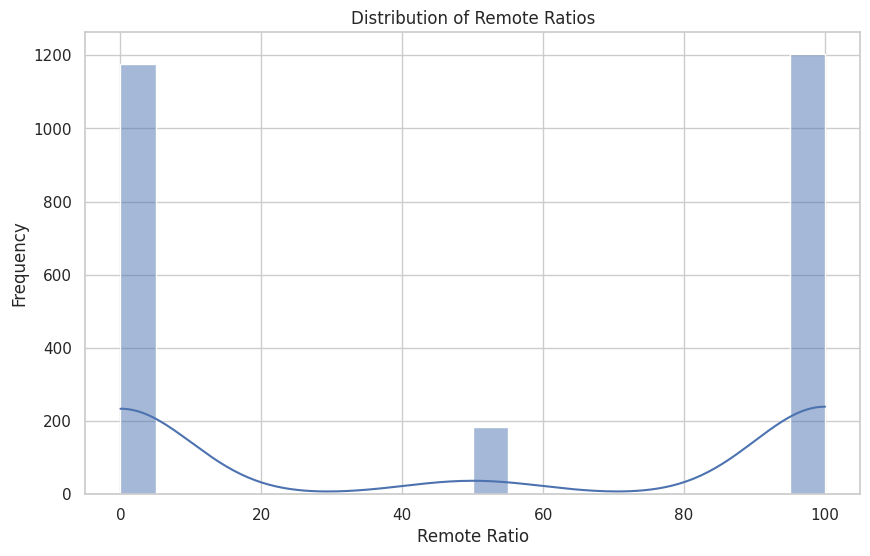

In [23]:
# Visualizing 'remote_ratio'
plt.figure(figsize=(10, 6))
sns.histplot(df['remote_ratio'], bins=20, kde=True)
plt.title('Distribution of Remote Ratios')
plt.xlabel('Remote Ratio')
plt.ylabel('Frequency')
plt.show()

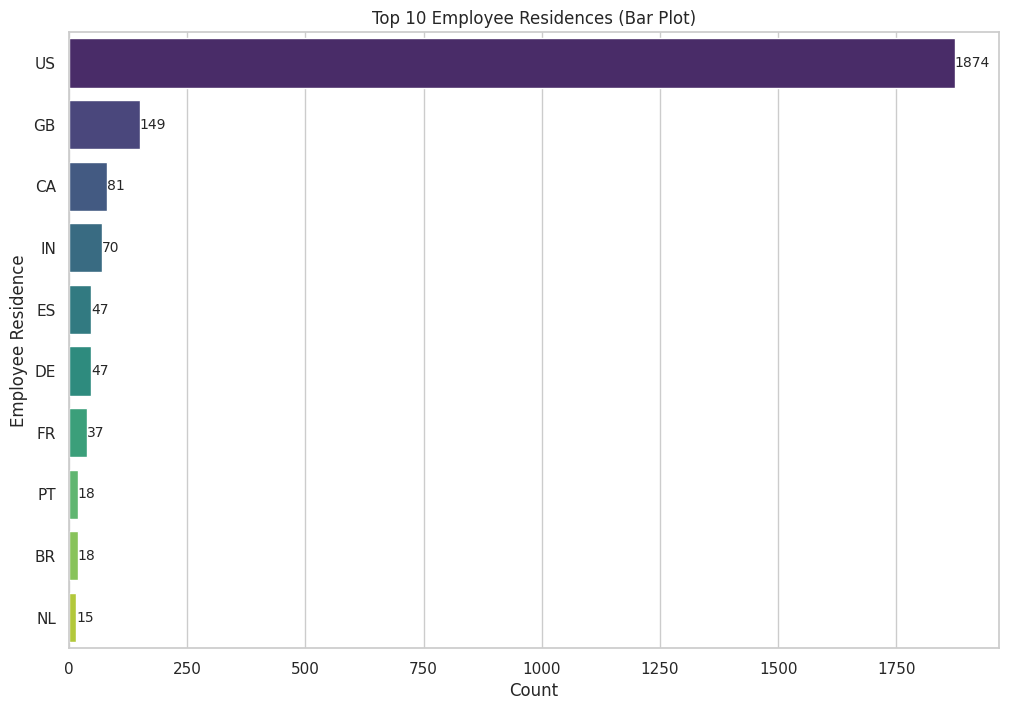

In [24]:
# Visualizing top 10 'employee_residence' as a horizontal bar plot
top_n = 10
top_residences = df['employee_residence'].value_counts().nlargest(top_n)

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=top_residences.values, y=top_residences.index, palette='viridis')

# Adding labels with values
for index, value in enumerate(top_residences.values):
    barplot.text(value, index, f'{value}', ha="left", va="center", fontsize=10)

plt.title(f'Top {top_n} Employee Residences (Bar Plot)')
plt.xlabel('Count')
plt.ylabel('Employee Residence')
plt.show()

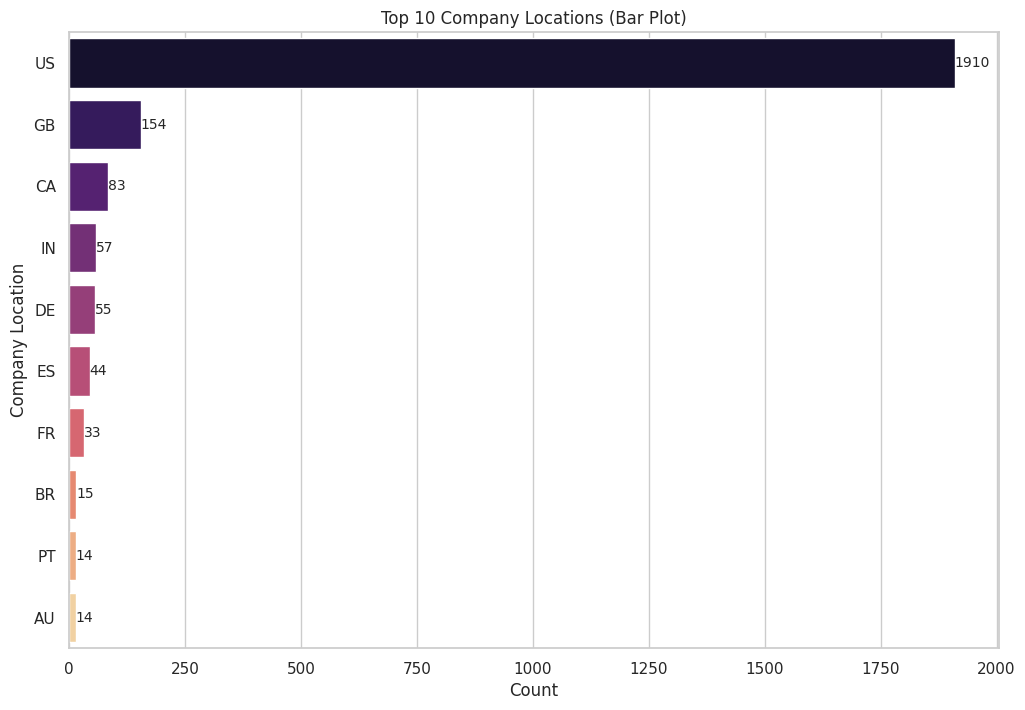

In [25]:
# Visualizing top 10 'company_location' as a horizontal bar plot
top_n = 10
top_locations = df['company_location'].value_counts().nlargest(top_n)

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=top_locations.values, y=top_locations.index, palette='magma')

# Adding labels with values
for index, value in enumerate(top_locations.values):
    barplot.text(value, index, f'{value}', ha="left", va="center", fontsize=10)

plt.title(f'Top {top_n} Company Locations (Bar Plot)')
plt.xlabel('Count')
plt.ylabel('Company Location')
plt.show()

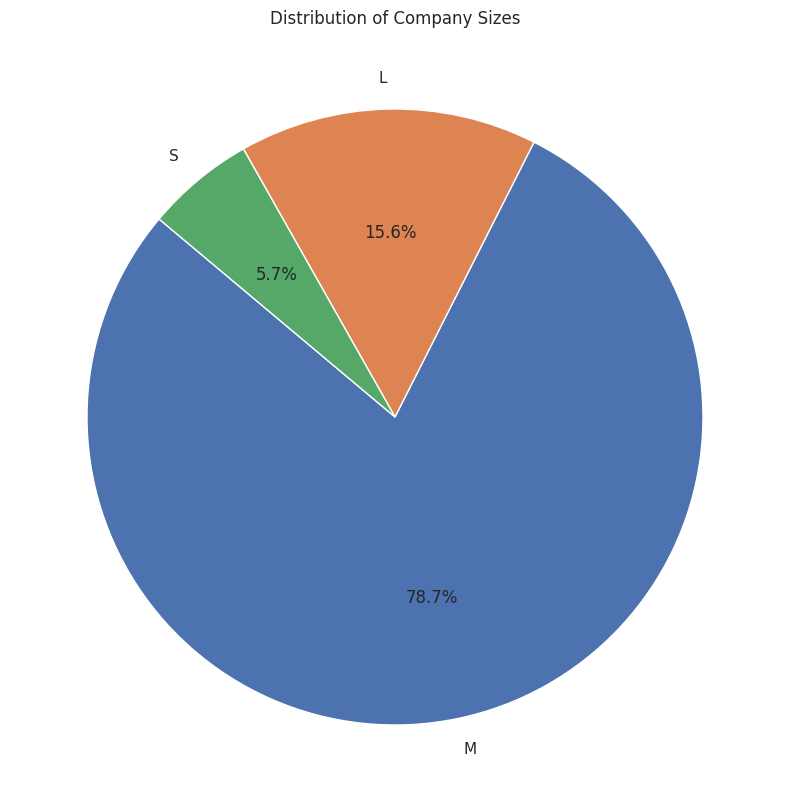

In [26]:
# Visualizing 'company_size' as a pie chart
plt.figure(figsize=(10, 10))
company_size_counts = df['company_size'].value_counts()
plt.pie(company_size_counts, labels=company_size_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Company Sizes')
plt.show()

### Question 1
**How does salary vary with different levels of experience?**

In [27]:
experience_salary_stats = df.groupby('experience_level')['salary_in_usd'].agg(['mean', 'median', 'count'])
experience_salary_stats = experience_salary_stats.sort_values(by='mean', ascending=False)

# Display the results
print(experience_salary_stats)

                           mean    median  count
experience_level                                
EX                186960.723404  186100.0     94
SE                151756.979207  148000.0   1539
MI                 99955.068182   95000.0    660
EN                 72648.685185   61900.0    270


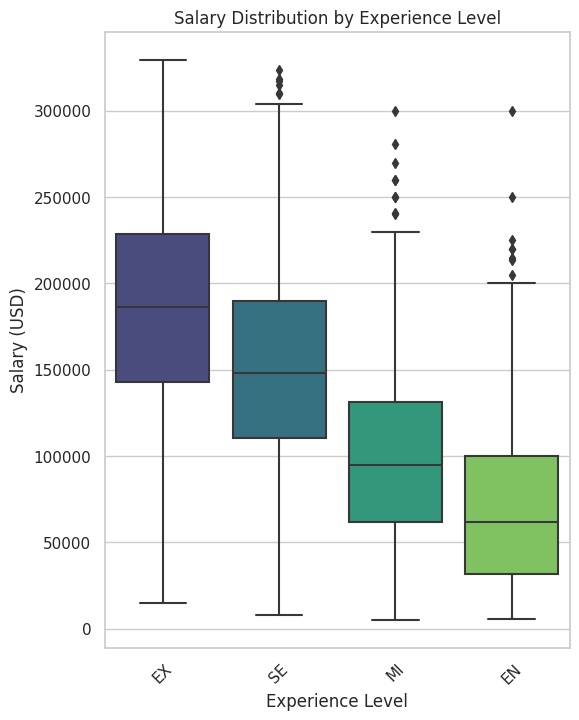

In [28]:
# Visualize salary distribution by experience level using a boxplot
plt.figure(figsize=(6, 8))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, order=experience_salary_stats.index, palette='viridis')
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45)
plt.show()

### Question 2
**Which job titles have the highest and lowest salaries?**

In [29]:
top_n = 10
job_salary_stats = df.groupby('job_title')['salary_in_usd'].agg(['mean', 'median', 'count'])
job_salary_stats = job_salary_stats.sort_values(by='mean', ascending=False).head(top_n)

# Display the results
print(job_salary_stats)

                                              mean    median  count
job_title                                                          
Cloud Data Architect                 250000.000000  250000.0      1
Data Lead                            212500.000000  212500.0      2
Principal Data Engineer              192500.000000  192500.0      2
Principal Machine Learning Engineer  190000.000000  190000.0      1
Applied Scientist                    185020.666667  191737.5     30
Head of Data                         183857.500000  202500.0     10
Data Science Manager                 181930.173077  175100.0     52
Director of Data Science             179334.800000  160833.5     10
Data Infrastructure Engineer         175051.666667  183655.0      6
Business Intelligence Engineer       174150.000000  171150.0      4


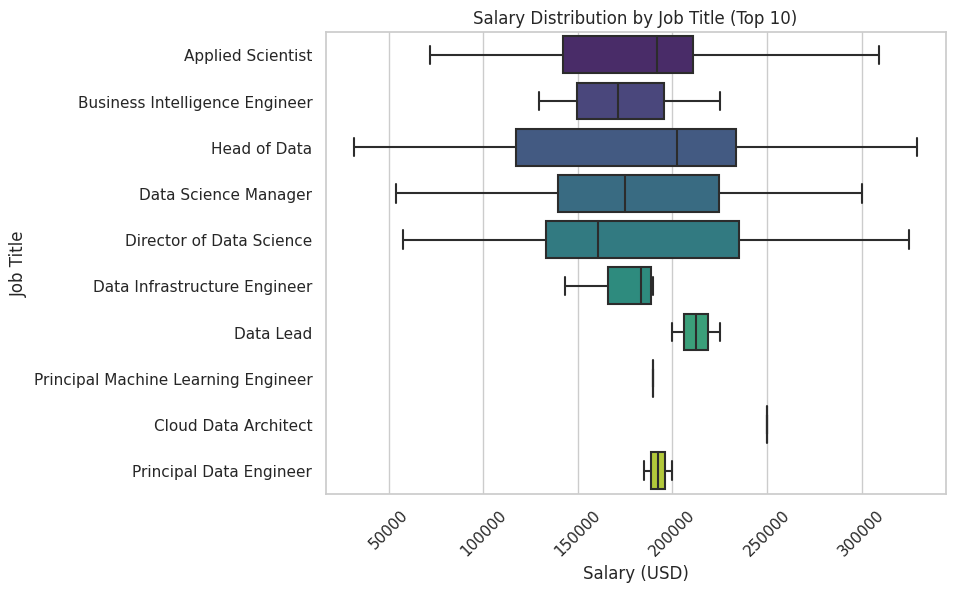

In [30]:
# Visualize salary distribution by job title using a boxplot for the top 10 titles
plt.figure(figsize=(8, 6))
top_n_job_titles = job_salary_stats.index
sns.boxplot(x='salary_in_usd', y='job_title', data=df[df['job_title'].isin(top_n_job_titles)], palette='viridis')
plt.title(f'Salary Distribution by Job Title (Top {top_n})')
plt.xlabel('Salary (USD)')
plt.xticks(rotation=45)
plt.ylabel('Job Title')
plt.show()

In [31]:
bottom_n = 10
job_salary_stats_bottom = df.groupby('job_title')['salary_in_usd'].agg(['mean', 'median', 'count'])
job_salary_stats_bottom = job_salary_stats_bottom.sort_values(by='mean', ascending=True).head(bottom_n)

# Display the results
print(job_salary_stats_bottom)

                                        mean   median  count
job_title                                                   
Power BI Developer                   5409.00   5409.0      1
Product Data Scientist               8000.00   8000.0      1
Staff Data Analyst                  15000.00  15000.0      1
Data Analytics Lead                 17509.00  17509.0      1
3D Computer Vision Researcher       21352.25  15000.0      4
Autonomous Vehicle Technician       26277.50  26277.5      2
Compliance Data Analyst             30000.00  30000.0      1
Principal Data Architect            38154.00  38154.0      1
Machine Learning Research Engineer  42819.25  43096.0      4
Insight Analyst                     46786.00  46786.0      2


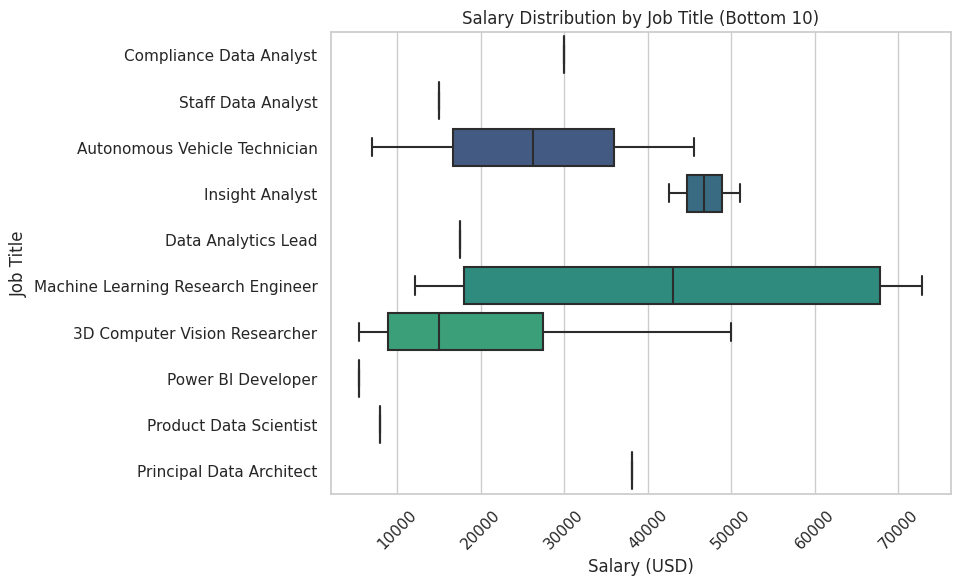

In [32]:
# Visualize salary distribution by job title using a boxplot for the bottom 10 titles
plt.figure(figsize=(8, 6))
bottom_n_job_titles = job_salary_stats_bottom.index
sns.boxplot(x='salary_in_usd', y='job_title', data=df[df['job_title'].isin(bottom_n_job_titles)], palette='viridis')
plt.title(f'Salary Distribution by Job Title (Bottom {bottom_n})')
plt.xlabel('Salary (USD)')
plt.xticks(rotation=45)
plt.ylabel('Job Title')
plt.show()

### Question 3
**How does salary differ between different employment types (e.g., full-time, part-time, contract)?**

In [33]:
employment_salary_stats = df.groupby('employment_type')['salary_in_usd'].agg(['mean', 'median', 'count'])
employment_salary_stats = employment_salary_stats.sort_values(by='mean', ascending=False)

# Display the results
print(employment_salary_stats)

                          mean    median  count
employment_type                                
FT               132491.163039  130000.0   2527
CT                79829.888889   60000.0      9
FL                51807.800000   50000.0     10
PT                39533.705882   21669.0     17


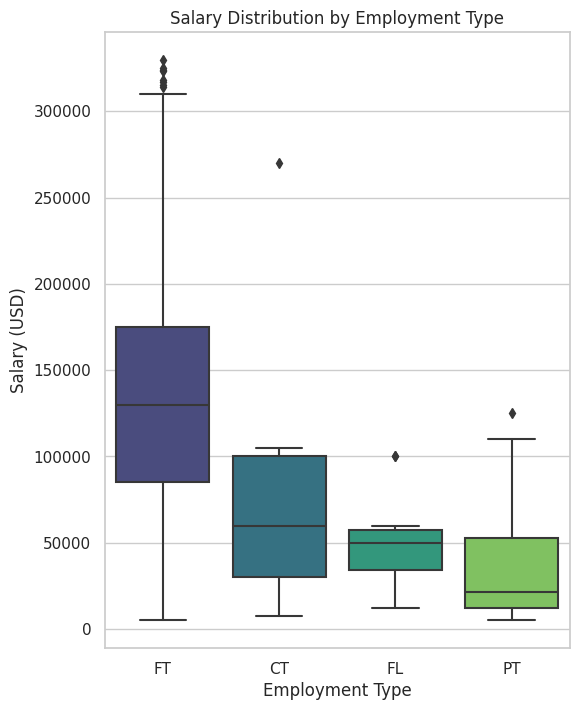

In [34]:
# Visualize salary distribution by employment type using a boxplot
plt.figure(figsize=(6, 8))
sns.boxplot(x='employment_type', y='salary_in_usd', data=df, order=employment_salary_stats.index, palette='viridis')
plt.title('Salary Distribution by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary (USD)')
plt.show()

### Question 4
**What are the salary ranges in different company locations?**

In [35]:
top_n = 10 
location_salary_stats = df.groupby('company_location')['salary_in_usd'].agg(['min', 'max', 'mean', 'median', 'count'])
location_salary_stats = location_salary_stats.sort_values(by='mean', ascending=False).head(top_n)

# Display the results
print(location_salary_stats)

                     min     max           mean    median  count
company_location                                                
PR                135000  200000  167500.000000  167500.0      4
US                  5679  329500  150141.352356  145000.0   1910
RU                 85000  230000  140333.333333  106000.0      3
CA                 15000  275000  130572.759036  120000.0     83
NZ                125000  125000  125000.000000  125000.0      1
BA                120000  120000  120000.000000  120000.0      1
IL                119059  119059  119059.000000  119059.0      1
IE                 68293  172309  114943.428571  101943.0      7
JP                 41689  260000  114127.333333   75682.0      6
SE                 80000  130000  105000.000000  105000.0      2


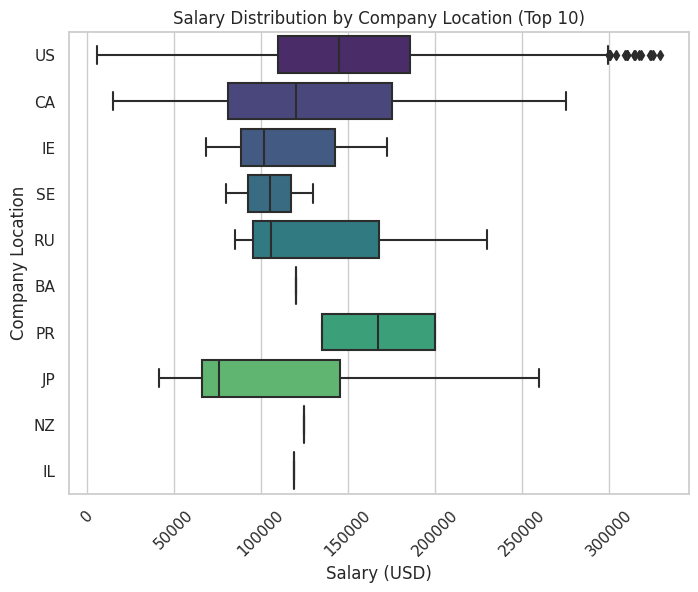

In [36]:
# Visualize salary distribution by company location using a boxplot for the top 10 locations
plt.figure(figsize=(8, 6))
top_n_locations = location_salary_stats.index
sns.boxplot(x='salary_in_usd', y='company_location', data=df[df['company_location'].isin(top_n_locations)], palette='viridis')
plt.title(f'Salary Distribution by Company Location (Top {top_n})')
plt.xlabel('Salary (USD)')
plt.xticks(rotation=45)
plt.ylabel('Company Location')
plt.show()

### Question 5
**How does the ratio of remote work affect salary?**

In [37]:
remote_salary_stats = df.groupby('remote_ratio')['salary_in_usd'].agg(['mean', 'median', 'count'])
remote_salary_stats = remote_salary_stats.sort_values(by='mean', ascending=False)

# Display the results
print(remote_salary_stats)

                       mean    median  count
remote_ratio                                
0             141491.774468  136000.0   1175
100           130159.566085  130000.0   1203
50             75021.600000   63040.0    185


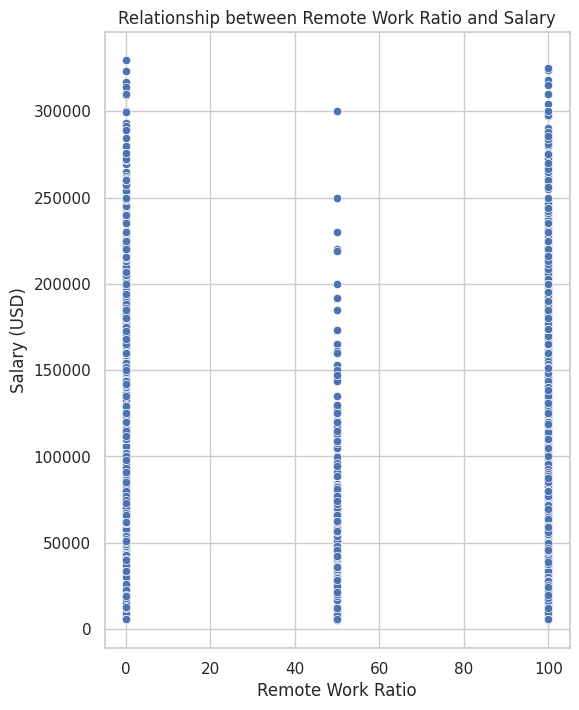

In [38]:
# Visualize the relationship between remote work ratio and salary using a scatter plot
plt.figure(figsize=(6, 8))
sns.scatterplot(x='remote_ratio', y='salary_in_usd', data=df)
plt.title('Relationship between Remote Work Ratio and Salary')
plt.xlabel('Remote Work Ratio')
plt.ylabel('Salary (USD)')
plt.show()

### Question 6
**Is there a relationship between company size and salary?**

In [39]:
size_salary_stats = df.groupby('company_size')['salary_in_usd'].agg(['mean', 'median', 'count'])
size_salary_stats = size_salary_stats.sort_values(by='mean', ascending=False)

# Display the results
print(size_salary_stats)

                       mean    median  count
company_size                                
M             140090.108135  136430.0   2016
L             107702.199501  100000.0    401
S              76051.705479   62146.0    146


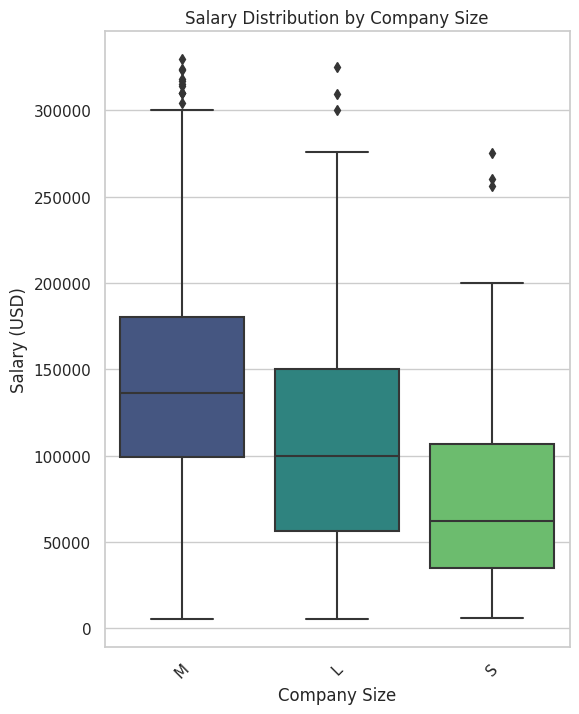

In [40]:
# Visualize salary distribution by company size using a boxplot
plt.figure(figsize=(6, 8))
sns.boxplot(x='company_size', y='salary_in_usd', data=df, order=size_salary_stats.index, palette='viridis')
plt.title('Salary Distribution by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45)
plt.show()

### Question 7
**Does the residence location of employees correlate with their salary?**

In [41]:
top_n_residence = 10
residence_salary_stats = df.groupby('employee_residence')['salary_in_usd'].agg(['min', 'max', 'mean', 'median', 'count'])
residence_salary_stats = residence_salary_stats.sort_values(by='mean', ascending=False).head(top_n_residence)

# Display the results
print(residence_salary_stats)

                       min     max           mean    median  count
employee_residence                                                
MY                  200000  200000  200000.000000  200000.0      1
PR                  135000  200000  166000.000000  160000.0      5
US                   24000  329500  151712.058164  146000.0   1874
CA                   10000  275000  130859.839506  120000.0     81
CN                  125404  125404  125404.000000  125404.0      1
NZ                  125000  125000  125000.000000  125000.0      1
BA                  120000  120000  120000.000000  120000.0      1
IE                   68293  172309  114943.428571  101943.0      7
DO                  110000  110000  110000.000000  110000.0      1
RU                   48000  230000  105750.000000   72500.0      4


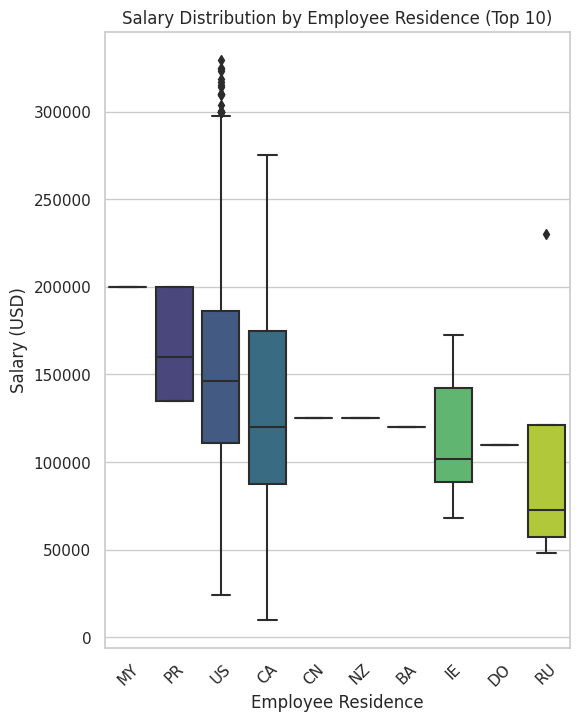

In [42]:
# Filter the original dataframe for the top 10 residence locations
df_top_residence = df[df['employee_residence'].isin(residence_salary_stats.index)]

# Visualize salary distribution by employee residence using a boxplot for the top 10 locations
plt.figure(figsize=(6, 8))
sns.boxplot(x='employee_residence', y='salary_in_usd', data=df_top_residence, order=residence_salary_stats.index, palette='viridis')
plt.title(f'Salary Distribution by Employee Residence (Top {top_n_residence})')
plt.xlabel('Employee Residence')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45)
plt.show()

### Question 8
**Have salaries changed over the years?**

In [43]:
salary_over_years = df.groupby('work_year')['salary_in_usd'].agg(['mean', 'median'])

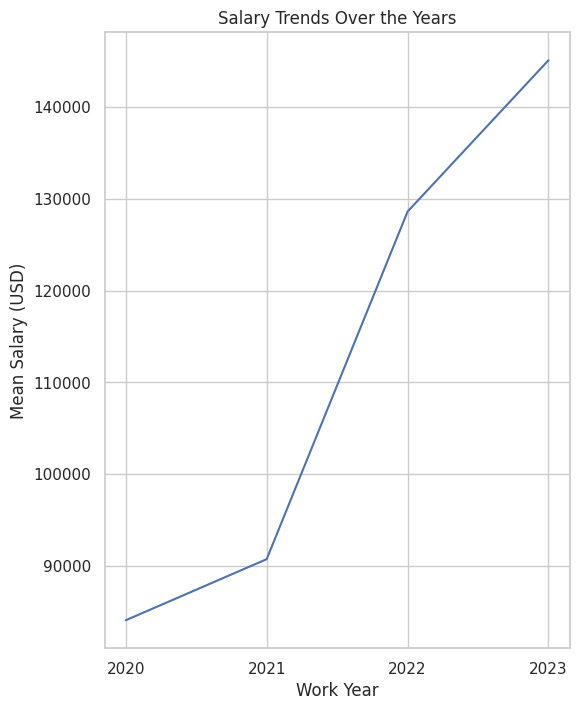

In [44]:
# Visualize salary trends over the years using a line plot
plt.figure(figsize=(6, 8))
sns.lineplot(x='work_year', y='salary_in_usd', data=df, estimator='mean', err_style=None)
plt.title('Salary Trends Over the Years')
plt.xlabel('Work Year')
plt.ylabel('Mean Salary (USD)')
# Set explicit tick locations on the x-axis
plt.xticks(df['work_year'].unique())
plt.show()